# PRE-PROCESSING

## 1. Import Libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Suppress warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Load File

In [35]:
df = pd.read_csv('../data/interim/online_retail_EDA.csv')
df_eda = df.copy()
df.head()

,CustomerID,LastPurchaseDate,Frequency,Monetary,Recency
0,12348,2011-09-25,3,904.44,75
1,12349,2011-11-21,1,1757.55,18
2,12350,2011-02-02,1,334.40,310
3,12352,2011-11-03,8,2506.04,36
4,12353,2011-05-19,1,89.00,204


In [36]:
df.shape

(3674, 5)

## 3. Pre-process Data

As seen during EDA, there are many outliers from the data. Since the focus of this project is on clustering, only the non-outliers will be processed by the model. 
Although outlier data is not in scope of this analysis, it is also recommended to perform separate analysis on those data as they represent extreme behaviours by the customers, such as very big spending and very frequent purchases.

The columns of interest are recency, frequency, and monetary, so all other columnns the dataset are be dropped. 

In [37]:
df = df.drop('LastPurchaseDate', axis=1)
df = df.set_index('CustomerID')
df.head()

,Frequency,Monetary,Recency
CustomerID,,,
12348,3,904.44,75
12349,1,1757.55,18
12350,1,334.40,310
12352,8,2506.04,36
12353,1,89.00,204


Prepare data for scaling

In [38]:
# Create a back up of the indexes and columns
rfm_idx = df.index
rfm_cols = df.columns

### 3.1 Scale the data

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df)

df_rfm_scaled = pd.DataFrame(rfm_scaled, columns=rfm_cols, index=rfm_idx)
display(df_rfm_scaled.head() )


,Frequency,Monetary,Recency
CustomerID,,,
12348,0.276110,0.136242,-0.201490
12349,-0.843567,1.285555,-0.820832
12350,-0.843567,-0.631719,2.351934
12352,3.075301,2.293924,-0.625250
12353,-0.843567,-0.962323,1.200176


Check if normalized. Mean ~ 0 and Standard Deviation ~ 1.

In [40]:
print(df_rfm_scaled.mean())
print('\n', df_rfm_scaled.std(ddof=0))

Frequency    4.254747e-17
Monetary    -8.509494e-17
Recency      2.514169e-17
dtype: float64

 Frequency    1.0
Monetary     1.0
Recency      1.0
dtype: float64


Visualize the distribution before and after normalization

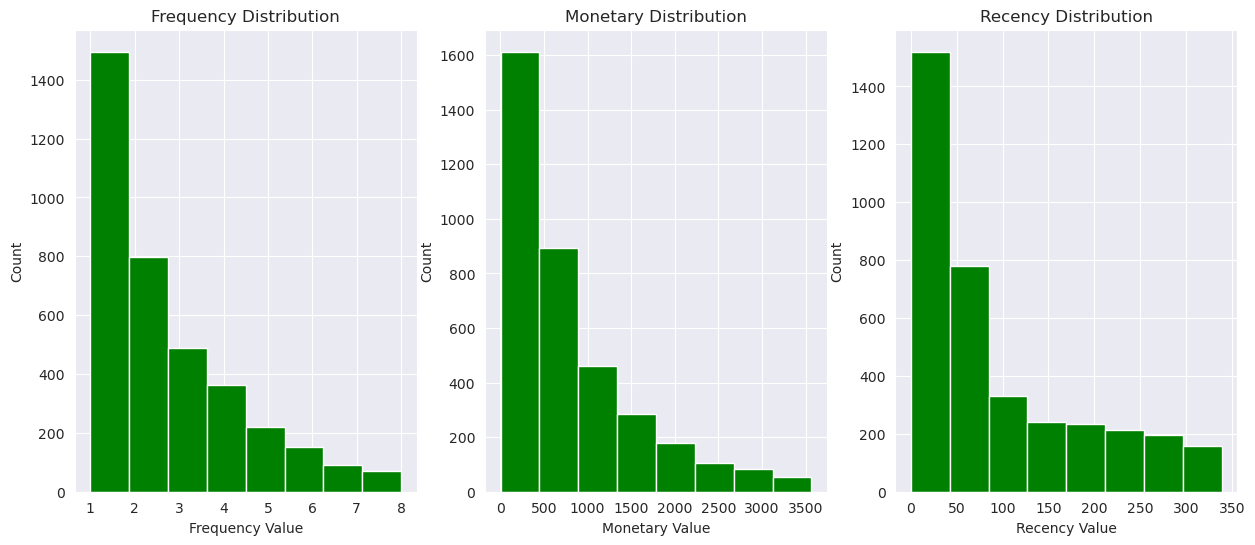

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,6), squeeze=False)

for idx, col in enumerate(df.columns):

    axes[0][idx].hist(df[col], bins=8, color='green')
    axes[0][idx].set_xlabel(col + ' Value')
    axes[0][idx].set_ylabel('Count')
    # plt.axvline(df_rfm_col[col].mean(), size)
    axes[0][idx].set_title( col + ' Distribution')

plt.show()  

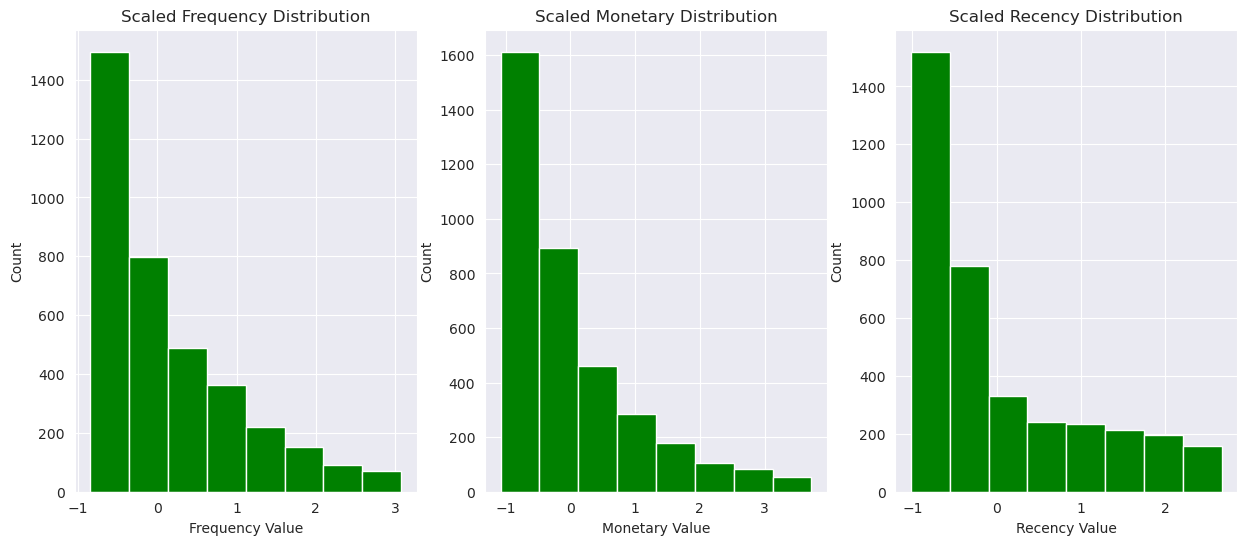

In [42]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15,6), squeeze=False)

for idx, col in enumerate(rfm_cols):

    axes[0][idx].hist(df_rfm_scaled[col], bins=8, color='green')
    axes[0][idx].set_xlabel(col + ' Value')
    axes[0][idx].set_ylabel('Count')
    # plt.axvline(df_rfm_col[col].mean(), size)
    axes[0][idx].set_title('Scaled ' + col + ' Distribution')

plt.show()    

After normalization, the shape of the distribution remains the same, but the data is now scaled. Below is a 3D plot of the scaled data.

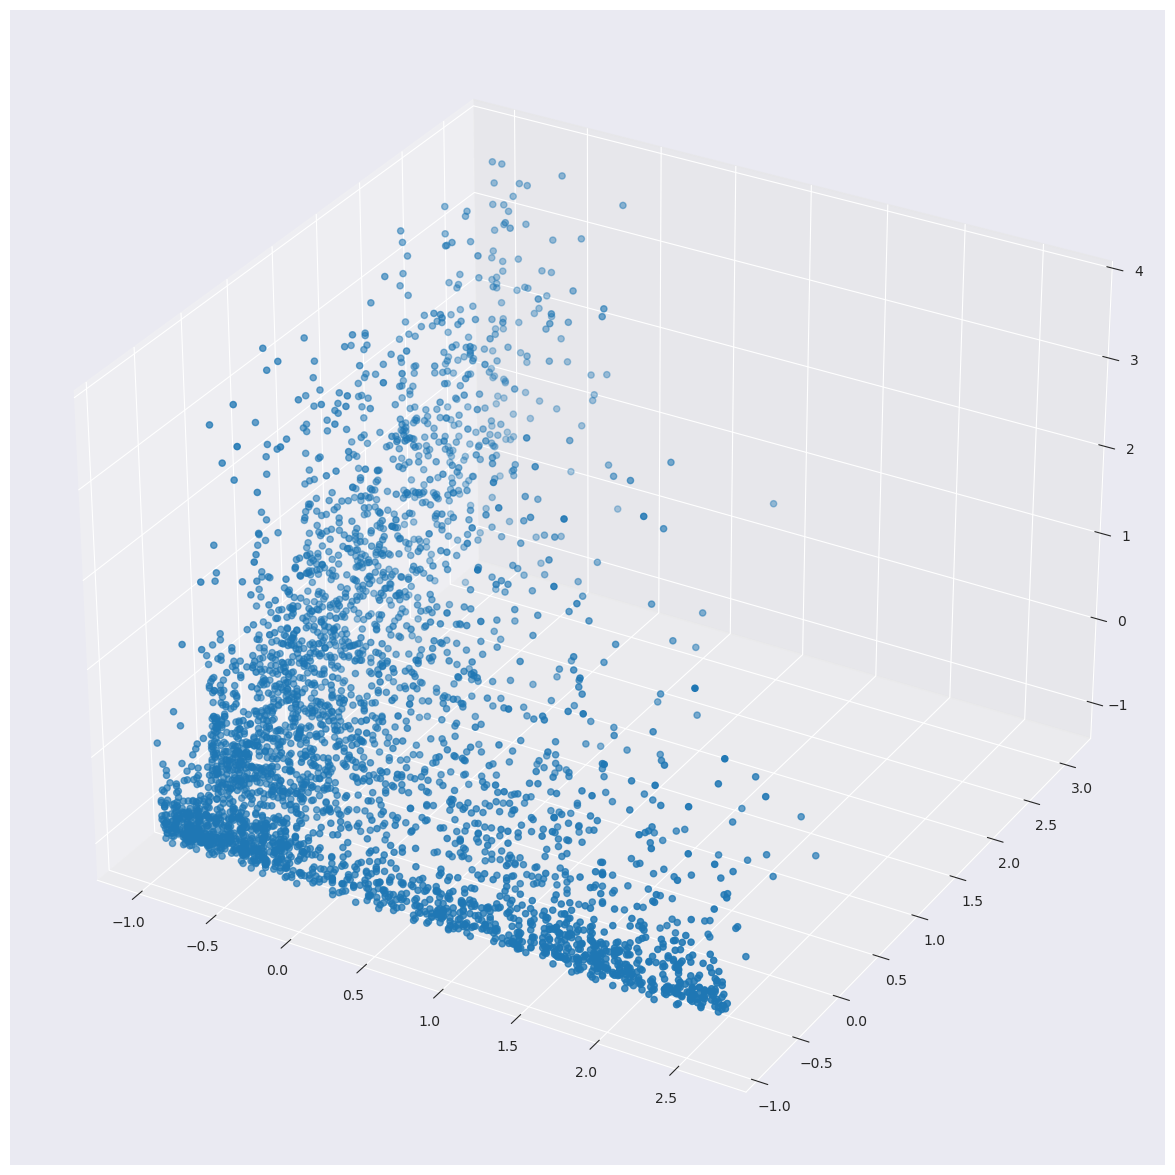

In [43]:
sns.set_style ("darkgrid")
plt.figure (figsize = (15,15))
seaborn_plt = plt.axes (projection='3d')
seaborn_plt.scatter3D(df_rfm_scaled.Recency, df_rfm_scaled.Frequency, df_rfm_scaled.Monetary)

Export the pre-processed data for modeling

In [44]:
df_rfm_scaled.to_csv("../data/interim/online_retail_preprocessed.csv",  index=False)